In [30]:
from pathlib import Path

import pandas as pd

OLD_LDIPC_SUBNATIONAL_FILEPATH = Path(
    '/share/resource_tracking/forecasting/poverty/GK_2024_income_distribution_forecasts/income_forecasting_through2100_admin2_final_nocoviddummy_intshift/admin2_ldipc_estimates.csv'
)
NEW_LDIPC_SUBNATIONAL_FILEPATH = Path(
    "/share/resource_tracking/forecasting/poverty/GK_2024_income_distribution_forecasts/income_forecasting_through2100_admin2_final_nocoviddummy_intshift_scenarios_newedu/admin2_ldipc_estimates_scenarios_corrected.csv"
)


In [31]:
old_ldi = pd.read_csv(OLD_LDIPC_SUBNATIONAL_FILEPATH)

new_ldi = pd.read_csv(NEW_LDIPC_SUBNATIONAL_FILEPATH)


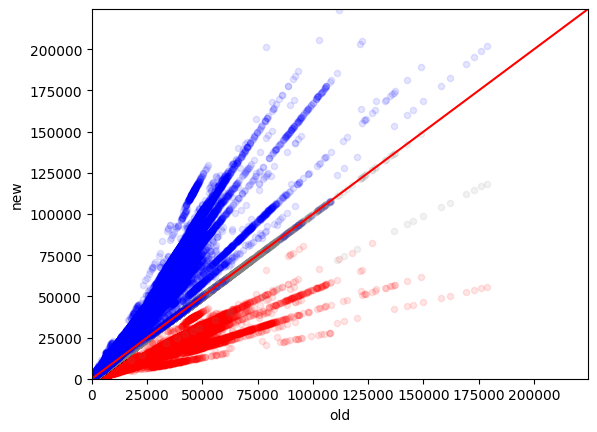

In [32]:
plot_data = (
    new_ldi.groupby(['scenario', 'location_id', 'year_id', 'population_percentile'])['ldipc'].mean()
    .rename('new')
    .to_frame()
    .join(old_ldi.groupby(['location_id', 'year_id', 'population_percentile'])['ldipc'].mean().rename('old'))
)
# plot_data['new'] *= 3

fig, ax = plt.subplots()
for scenario, color in [(-1, 'red'), (0, 'grey'), (1, 'blue')]:
    (plot_data.loc[scenario, :, 2100, 0.5]).plot(
        kind='scatter',
        x='old',
        y='new',
        color=color,
        alpha=0.1,
        ax=ax,
    )
ax.plot(
    (0, plot_data.loc[:, :, 2100, 0.5].dropna().values.max()),
    (0, plot_data.loc[:, :, 2100, 0.5].dropna().values.max()),
    color='red'
)
ax.set_xlim((0, plot_data.loc[:, :, 2050, 0.5].dropna().values.max()))
ax.set_ylim((0, plot_data.loc[:, :, 2050, 0.5].dropna().values.max()))
fig.show()
